<h1>Image Moments</h1>

In [2]:
#importação das bibliotecas
import cv2
import os
import glob
import csv

#questão 49
import numpy as np
from skimage import feature

## What are Image Moments?
Image moments are a weighted average of image pixel intensities. Let’s pick a simple example to understand the previous statement.

For simplicity, let us consider a single channel binary image I. The pixel intensity at location (x,y) is given by I(x,y). Note for a binary image I(x,y) can take a value of 0 or 1.

The simplest kind of moment we can define is given below

(1)
𝑀=∑𝑥∑𝑦𝐼(𝑥,𝑦)
 
All we are doing in the above equation is calculating the sum of all pixel intensities. In other words, all pixel intensities are weighted only based on their intensity, but not based on their location in the image.

For a binary image, the above moment can be interpreted in a few different ways

It is the number of white pixels ( i.e. intensity = 1 ). It is area of white region in the image. So far you may not be impressed with image moments, but here is something interesting. Figure 1 contains three binary images — S ( S0.png ), rotated S ( S5.png ), and K ( K0.png ).

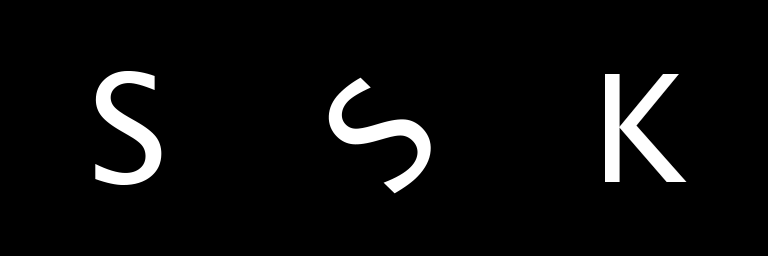

This image moment for S and rotated S will be very close, and the moment for K will be different.

For two shapes to be the same, the above image moment will necessarily be the same, but it is not a sufficient condition. We can easily construct two images where the above moment is the same, but they look very different.

## How are image moments calculated?
Let’s look at some more complex moments.

(2)
𝑀𝑖𝑗=∑𝑥∑𝑦𝑥𝑖𝑦𝑗𝐼(𝑥,𝑦)
 
where i and j are integers ( e.g. 0, 1, 2 ….). These moments are often referred to as raw moments to distinguish them from central moments mentioned later in this article.

Note the above moments depend on the intensity of pixels and their location in the image. So intuitively these moments are capturing some notion of shape.

## Questão 46
Abrir uma sequência de imagens coloridas, transformar para tom de cinza cada imagem e obtenha os momentos estatísticos de todas estas imagens. Imprima os resultados de cada imagem em um arquivo e na tela do prompt de comandos. Cada linha do arquivo gerado deve representar os atributos obtidos em uma imagem.

In [3]:
def extract_spatial_moments(images):
    print('[INFO] Extracting spatial moments.')
    spatial_moments = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        file = cv2.imread(image)

        # Convert to grayscale
        file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

        # Extract the moments
        moments = cv2.moments(file)

        # Create a list with the features extracted
        spatial_moments.append([moments['m00'], moments['m10'], moments['m01'], moments['m20'], moments['m11'],
                                moments['m02'], moments['m30'], moments['m21'], moments['m12'], moments['m03']])

    print('\n')

    return spatial_moments

## Questão 47
Abrir uma sequência de imagens coloridas, transformar para tom de cinza cada imagem e obtenha os momentos centrais de todas estas imagens. Imprima os resultados de cada imagem em um arquivo e na tela do prompt de comandos. Cada linha do arquivo gerado deve representar os atributos obtidos em uma imagem.

In [4]:
def extract_central_moments(images):
    print('[INFO] Extracting central moments.')
    central_moments = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        file = cv2.imread(image)

        # Convert to grayscale
        file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

        # Extract the moments
        moments = cv2.moments(file)

        # Create a list with the features extracted
        central_moments.append([moments['mu20'], moments['mu11'], moments['mu02'], moments['mu30'],
                                moments['mu21'], moments['mu12'], moments['mu03']])

    print('\n')

    return central_moments

## Questão 48
Abrir uma sequência de imagens coloridas, transformar para tom de cinza cada imagem e obtenha os momentos de HU (também conhecidos como momentos invariantes) de todas estas imagens. Imprima os resultados de cada imagem em um arquivo e na tela do prompt de comandos. Cada linha do arquivo gerado deve representar os atributos obtidos em uma imagem.

## What are Hu Moments?
It is great that central moments are translation invariant. But that is not enough for shape matching. We would like to calculate moments that are invariant to translation, scale, and rotation as shown in the Figure below.

Fortunately, we can in fact calculate such moments and they are called Hu Moments.

### Definition
<p>Hu Moments ( or rather Hu moment invariants ) are a set of 7 numbers calculated using central moments that are invariant to image transformations. The first 6 moments have been proved to be invariant to translation, scale, and rotation, and reflection. While the 7th moment’s sign changes for image reflection.
</p>

The 7 moments are calculated using the following formulae :

(6) \begin{align*} h_0 &= \eta_{20} + \eta_{02} \\ h_1 &= (\eta_{20} - \eta_{02})^2 + 4 \eta_{11}^2 \\ h_2 &= (\eta_{30} - 3 \eta_{12})^2 + (3 \eta_{21} - \eta_{03})^2 \\ h_3 &= (\eta_{30} + \eta_{12})^2 + (\eta_{21} + \eta_{03})^2 \\ h_4 &= (\eta_{30} - 3 \eta_{12})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2 - 3 (\eta_{21} + \eta_{03})^2] + (3 \eta_{21} - \eta_{03})[3 (\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2] \\ h_5 &= (\eta_{20} - \eta_{02})[(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2 + 4 \eta_{11} (\eta_{30} + \eta_{12})(\eta_{21} + \eta_{03})] \\ h_6 &= (3\eta_{21} - \eta_{03})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2 - 3(\eta_{21} + \eta_{03})^2] + (\eta_{30} - 3\eta_{12})(\eta_{21} + \eta_{03})[3(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2] \end{align*}



In [5]:
def extract_hu_moments(images):
    print('[INFO] Extracting HU Moments.')
    complete_hu_moments = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        file = cv2.imread(image)

        # Convert to grayscale
        file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

        # Extract the moments
        moments = cv2.moments(file)

        # Create a list with the features extracted
        hu_moments = cv2.HuMoments(moments)
        new_moments = [moment[0] for moment in hu_moments]

        complete_hu_moments.append(new_moments)

    print('\n')

    return complete_hu_moments


## Questão 49
Abrir uma sequência de imagens coloridas, transformar para tom de cinza cada imagem e obtenha os Local Binary Pattern (LBP) de todas estas imagens. Imprima os resultados de cada imagem em um arquivo e na tela do prompt de comandos. Cada linha do arquivo gerado deve representar os atributos obtidos em uma imagem.

## What are Local Binary Patterns?

Local Binary Patterns, or LBPs for short, are a texture descriptor made popular by the work of Ojala et al. in their 2002 paper, Multiresolution Grayscale and Rotation Invariant Texture Classification with Local Binary Patterns (although the concept of LBPs were introduced as early as 1993).

Unlike Haralick texture features that compute a global representation of texture based on the Gray Level Co-occurrence Matrix, LBPs instead compute a local representation of texture. This local representation is constructed by comparing each pixel with its surrounding neighborhood of pixels.

The first step in constructing the LBP texture descriptor is to convert the image to grayscale. For each pixel in the grayscale image, we select a neighborhood of size r surrounding the center pixel. A LBP value is then calculated for this center pixel and stored in the output 2D array with the same width and height as the input image.

For example, let’s take a look at the original LBP descriptor which operates on a fixed 3 x 3 neighborhood of pixels just like this:

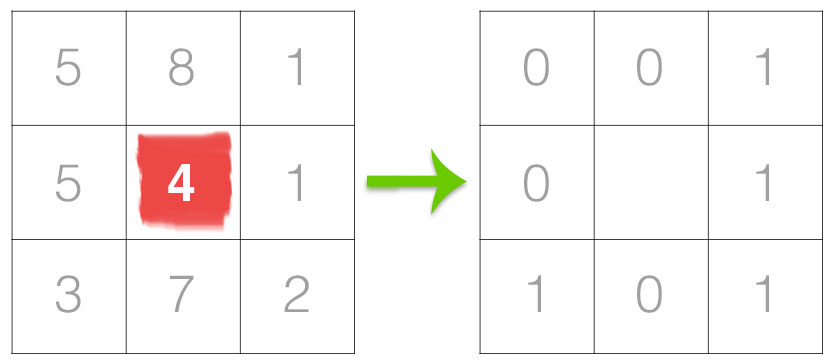!
Figure 1: The first step in constructing a LBP is to take the 8 pixel neighborhood surrounding a center pixel and construct it to construct a set of 8 binary digits.


In the above figure we take the center pixel (highlighted in red) and threshold it against its neighborhood of 8 pixels. If the intensity of the center pixel is greater-than-or-equal to its neighbor, then we set the value to 1; otherwise, we set it to 0. With 8 surrounding pixels, we have a total of 2 ^ 8 = 256 possible combinations of LBP codes.

From there, we need to calculate the LBP value for the center pixel. We can start from any neighboring pixel and work our way clockwise or counter-clockwise, but our ordering must be kept consistent for all pixels in our image and all images in our dataset. Given a 3 x 3 neighborhood, we thus have 8 neighbors that we must perform a binary test on. The results of this binary test are stored in an 8-bit array, which we then convert to decimal, like this:

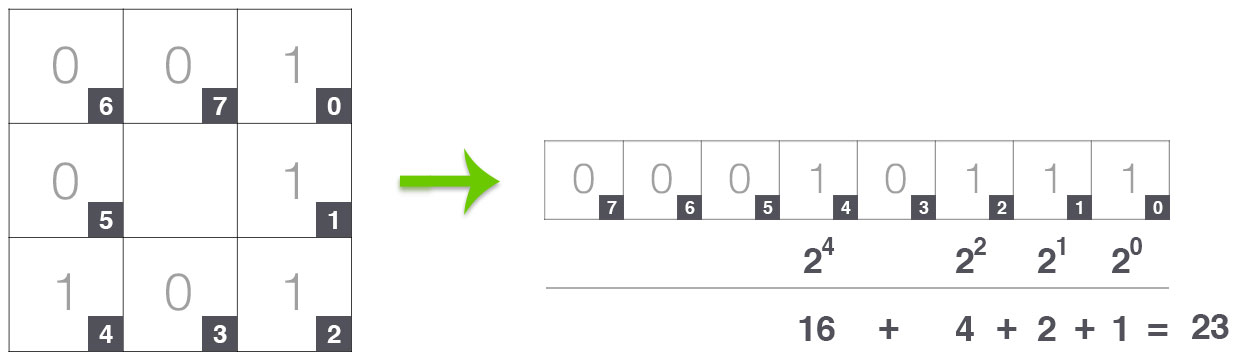
Figure 2: Taking the 8-bit binary neighborhood of the center pixel and converting it into a decimal representation. (Thanks to Hanzra Tech for the inspiration on this visualization!)


In this example we start at the top-right point and work our way clockwise accumulating the binary string as we go along. We can then convert this binary string to decimal, yielding a value of 23.

This value is stored in the output LBP 2D array, which we can then visualize below:

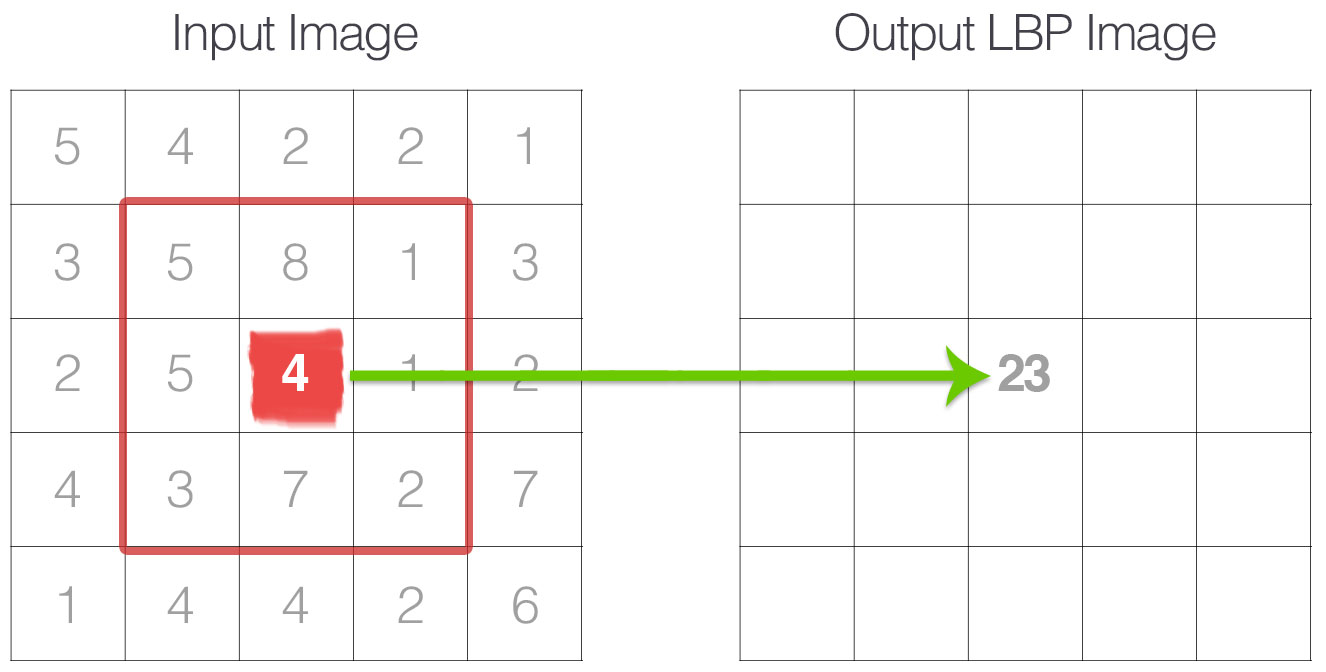
Figure 3: The calculated LBP value is then stored in an output array with the same width and height as the original image.

This process of thresholding, accumulating binary strings, and storing the output decimal value in the LBP array is then repeated for each pixel in the input image.

Here is an example of computing and visualizing a full LBP 2D array:
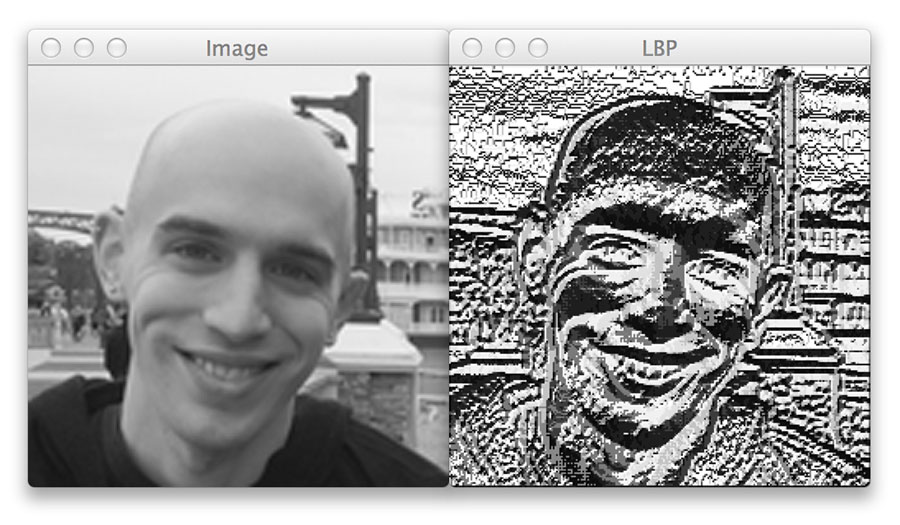
Figure 4: An example of computing the LBP representation (right) from the original input image (left).

The last step is to compute a histogram over the output LBP array. Since a 3 x 3 neighborhood has 2 ^ 8 = 256 possible patterns, our LBP 2D array thus has a minimum value of 0 and a maximum value of 255, allowing us to construct a 256-bin histogram of LBP codes as our final feature vector:

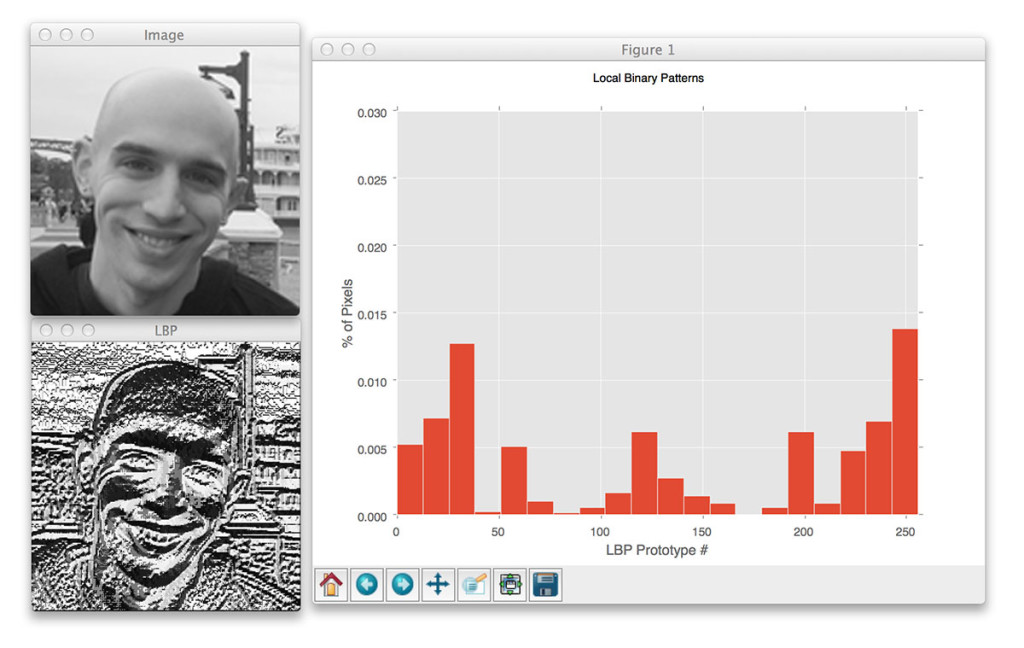

Figure 5: Finally, we can compute a histogram that tabulates the number of times each LBP pattern occurs. We can treat this histogram as our feature vector.

A primary benefit of this original LBP implementation is that we can capture extremely fine-grained details in the image. However, being able to capture details at such a small scale is also the biggest drawback to the algorithm — we cannot capture details at varying scales, only the fixed 3 x 3 scale!

To handle this, an extension to the original LBP implementation was proposed by Ojala et al. to handle variable neighborhood sizes. To account for variable neighborhood sizes, two parameters were introduced:

The number of points p in a circularly symmetric neighborhood to consider (thus removing relying on a square neighborhood).
The radius of the circle r, which allows us to account for different scales.
Below follows a visualization of these parameters:


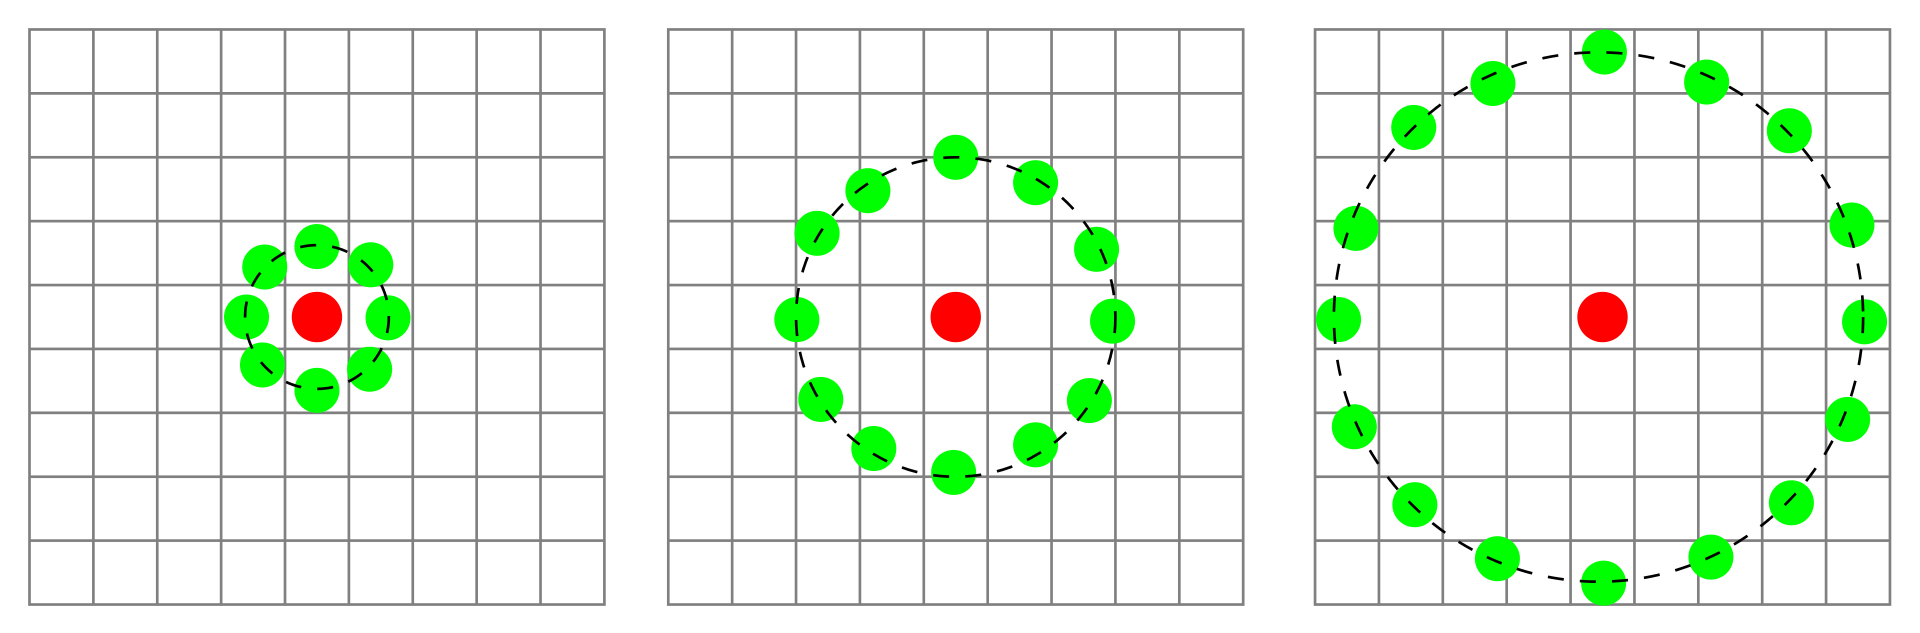
Figure 6: Three neighborhood examples with varying p and r used to construct Local Binary Patterns.

Lastly, it’s important that we consider the concept of LBP uniformity. A LBP is considered to be uniform if it has at most two 0-1 or 1-0 transitions. For example, the pattern 00001000  (2 transitions) and 10000000  (1 transition) are both considered to be uniform patterns since they contain at most two 0-1 and 1-0 transitions. The pattern 01010010 ) on the other hand is not considered a uniform pattern since it has six 0-1 or 1-0 transitions.

The number of uniform prototypes in a Local Binary Pattern is completely dependent on the number of points p. As the value of p increases, so will the dimensionality of your resulting histogram. Please refer to the original Ojala et al. paper for the full explanation on deriving the number of patterns and uniform patterns based on this value. However, for the time being simply keep in mind that given the number of points p in the LBP there are p + 1 uniform patterns. The final dimensionality of the histogram is thus p + 2, where the added entry tabulates all patterns that are not uniform.

So why are uniform LBP patterns so interesting? Simply put: they add an extra level of rotation and grayscale invariance, hence they are commonly used when extracting LBP feature vectors from images.

In [6]:
def extract_lbp(images, number_points, radius, eps=1e-7):
    print('[INFO] Extracting LBP.')
    lbp_features = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        file = cv2.imread(image)

        # Convert to grayscale
        file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

        # Extract lbp
        lbp = feature.local_binary_pattern(file, number_points, radius, method='uniform')

        # Calculates the histogram of the lbp image
        hist, ret = np.histogram(lbp.ravel(), bins=np.arange(0, number_points + 3), range=(0, number_points + 2))

        hist = hist.astype('float')
        hist /= (hist.sum() + eps)

        # Create the feature vector extracted by lbp
        image_lbp = [item for item in list(hist)]

        lbp_features.append(image_lbp)

    print('\n')

    return lbp_features


## Questão 50
Abrir uma sequência de imagens coloridas, transformar para tom de cinza cada imagem e obtenha as Texturas de Haralick que são calculadas à partir da matriz de co-ocorrência (GLCM em inglês) de todas estas imagens. Imprima os resultados de cada imagem em um arquivo e na tela do prompt de comandos. Cada linha do arquivo gerado deve representar os atributos obtidos em uma imagem.

## Haralick texture features

The basis for these features is the gray-level co-occurrence matrix ( G in Equation 2.6). This matrix is square with dimension Ng, where Ng is the number of gray levels in the image. Element [i,j] of the matrix is generated by counting the number of times a pixel with value i is adjacent to a pixel with value j and then dividing the entire matrix by the total number of such comparisons made. Each entry is therefore considered to be the probability that a pixel with value i will be found adjacent to a pixel of value j.

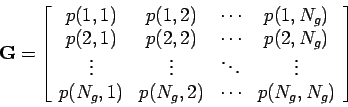	(2.6)

Since adjacency can be defined to occur in each of four directions in a 2D, square pixel image (horizontal, vertical, left and right diagonals - see Figure 2.2), four such matrices can be calculated.

  
Figure 2.2: Four directions of adjacency as defined for calculation of the Haralick texture features. The Haralick statistics are calculated for co-occurrence matrices generated using each of these directions of adjacency.

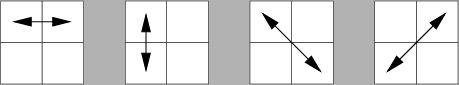

Zernike moments through degree 12 were calculated (Znl such that $n\leq 12$ in Equation 2.4) using the code in Section 5.2.1 (p. [*]). Since the moments themselves are complex numbers and are sensitive to rotation of the image, the magnitudes of the moments were used as features (i.e. |Znl|) [21]. This provided 49 descriptive features for each image.

Haralick then described 14 statistics that can be calculated from the co-occurrence matrix with the intent of describing the texture of the image:

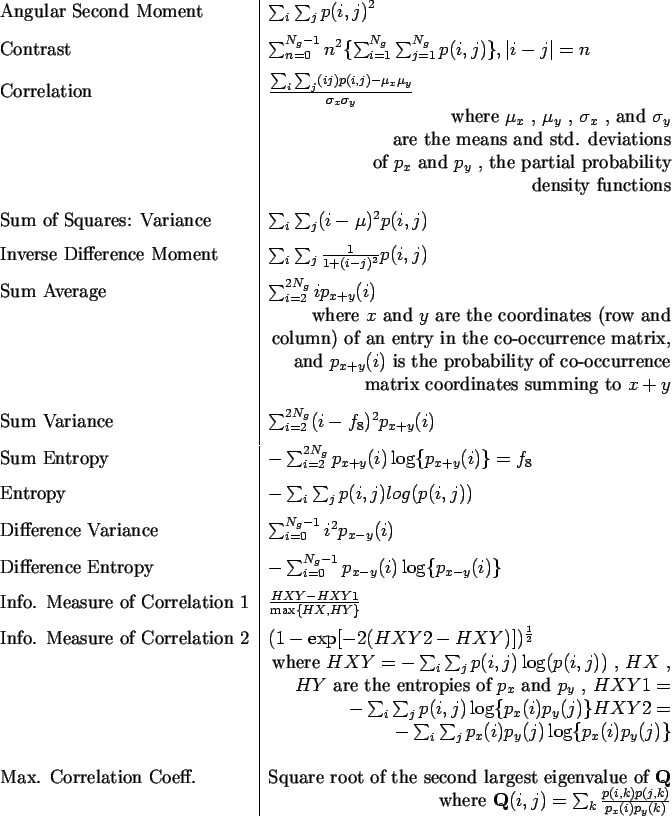

Since rotation invariance is a primary criterion for any features used with these images, a kind of invariance was achieved for each of these statistics by averaging them over the four directional co-occurrence matrices. The maximal correlation coefficient was not calculated due to computational instability so there were 13 texture features for each image.

In [11]:
def extract_glcm(images, distances, angles):
    print('[INFO] Extracting GLCM.')
    glcm_features = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        file = cv2.imread(image)

        # Convert to grayscale
        file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

        # Extract lbp
        glcm = feature.greycomatrix(file, distances, angles, 256, symmetric=False, normed=True)

        # Create a list with the features of GLCM
        glcm_properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        features = [feature.greycoprops(glcm, glcm_property)[0, 0] for glcm_property in glcm_properties]

        glcm_features.append(features)

    print('\n')

    return glcm_features


## save results and main 
com todas as chamadas das funções. 
e salvando os arquivos com os dados


In [12]:
def save_results(extractor_name, features):

    # Show the extracted features in command prompt
    for vector in features:
        print(vector)

    # Save all features in a csv file
    with open(extractor_name + '.csv', 'w') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(features)


In [13]:
if __name__ == '__main__':

    # Inform the path to the rgb images
    dataset = 'dataset/'

    # Grab all the paths to the images with extension .jpg
    image_paths = glob.glob(os.path.join(dataset, '*.jpg'))

    # Extract Spatial Moments
    features = extract_spatial_moments(image_paths)

    # Save the results in a csv file.
    save_results('SpatialMoments', features)
    
        # Extract central Moments
    features = extract_central_moments(image_paths)

    # Save the results in a csv file.
    save_results('CentralMoments', features)
    
        # Extract HU Moments
    features = extract_hu_moments(image_paths)

    # Save the results in a csv file.
    save_results('HUMoments', features)
    
    
    # Extract LBP
    features = extract_lbp(image_paths, number_points=24, radius=8)

    # Save the results in a csv file.
    save_results('LBP', features)
    
    # Extract GLCM
    features = extract_glcm(image_paths, distances=[5], angles=[0])

    # Save the results in a csv file.
    save_results('GLCM', features)

[INFO] Extracting spatial moments.


[INFO] Extracting central moments.


[INFO] Extracting HU Moments.


[INFO] Extracting LBP.


[INFO] Extracting GLCM.


